<a href="https://colab.research.google.com/github/dacenish/Deep-Learning/blob/main/Mnist_Classification_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [123]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [107]:
X_train.shape

(60000, 28, 28)

In [108]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

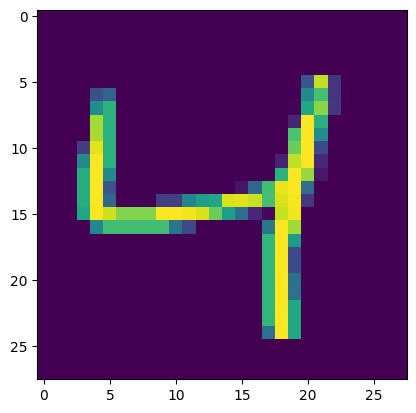

In [109]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [135]:
X_train = X_train/253
X_test = X_test/253

In [136]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [137]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [138]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy']) # using this loss func gives one edge that you dont have to encode the categorical data.

In [140]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2858 - accuracy: 0.9160 - val_loss: 0.1495 - val_accuracy: 0.9561
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1184 - accuracy: 0.9645 - val_loss: 0.1080 - val_accuracy: 0.9671
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0812 - accuracy: 0.9750 - val_loss: 0.1046 - val_accuracy: 0.9689
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.0966 - val_accuracy: 0.9736
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0486 - accuracy: 0.9845 - val_loss: 0.0869 - val_accuracy: 0.9756
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.1052 - val_accuracy: 0.9714
Epoch 7/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.1084 - val_accura

In [142]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [143]:
y_pred = y_prob.argmax(axis=1)

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test, y_pred)

0.9743

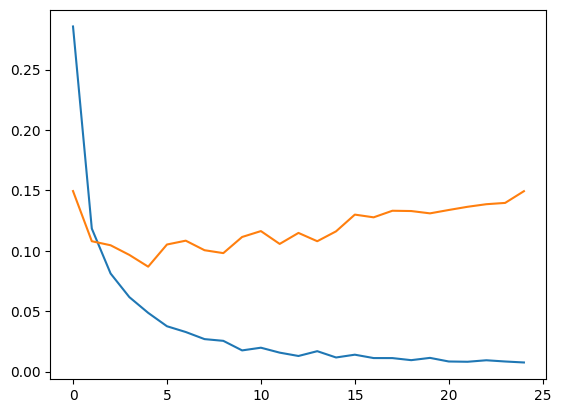

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

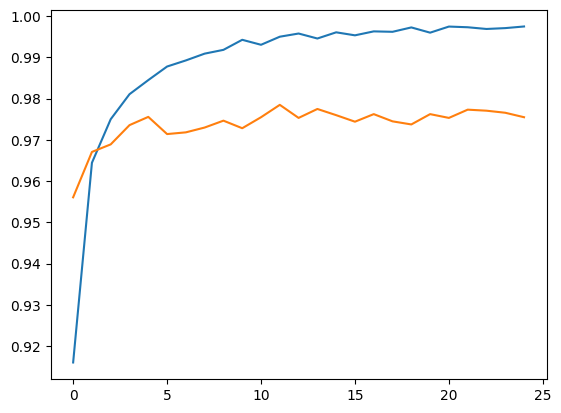

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

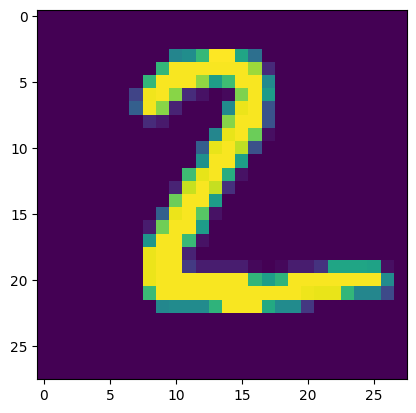

In [148]:
plt.imshow(X_test[1])

In [149]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2])